In [1]:
import sys, os
# Note that the path ./Albedo_project/data_processing is now in the path
import xarray as xr

# Local Imports
curdir = os.getcwd()
#print(curdir)
sys.path.insert(0, curdir+"/../data_processing")
sys.path.insert(0, curdir+"/../visualization")
import ceres_ebaf
import ceres_ebaf_plotting

In [2]:
current_month_folder="June23"
file_name = "/Users/mawa7160/dev/data/CERES/EBAF/CERES_EBAF-TOA_Ed4.2_Subset_200003-202303.nc"
full_years = xr.open_dataset(file_name)

In [10]:
solar_global_trends = ceres_ebaf.create_trends_at_each_location(full_years["solar_mon"], time_weighting=2, end_yr="2023")
print("1")
shortwave_all_sky_trends = ceres_ebaf.create_trends_at_each_location(full_years["toa_sw_all_mon"], time_weighting=2, end_yr="2023")
print("2")
shortwave_clear_sky_trends = ceres_ebaf.create_trends_at_each_location(full_years["toa_sw_clr_c_mon"], time_weighting=2, end_yr="2023")
print("3")
cre_total = shortwave_all_sky_trends-shortwave_clear_sky_trends

1
2
3


In [ ]:
ceres_ebaf_plotting.plot_spatial_data_trends(shortwave_all_sky_trends["trend"], title="All Sky")
ceres_ebaf_plotting.plot_spatial_data_trends(shortwave_all_sky_trends["pValue"], title="All Sky")
ceres_ebaf_plotting.plot_spatial_data_trends(shortwave_all_sky_trends["rSquared"], title="All Sky")

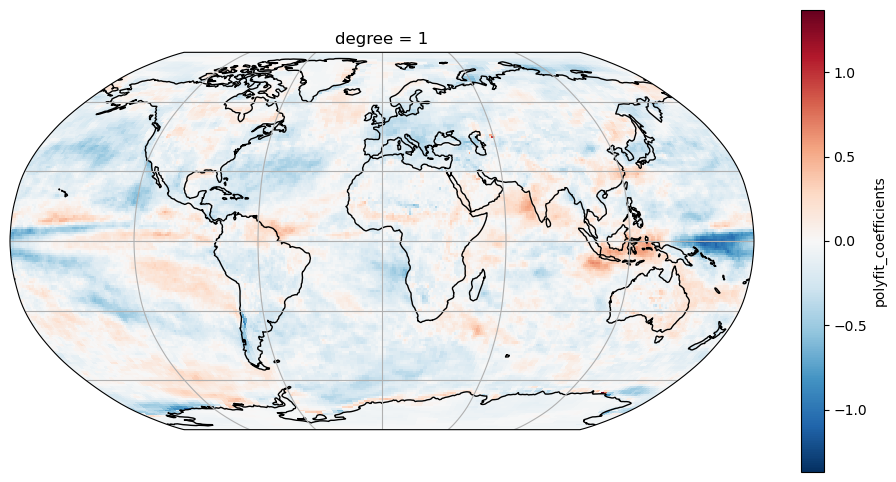

In [3]:
sw_all_global_trends = ceres_ebaf.create_polyfit_trend_at_each_location(full_years["toa_sw_all_mon"], time_weighting=2, end_yr="2023")
ceres_ebaf_plotting.plot_spatial_data_trends(sw_all_global_trends)

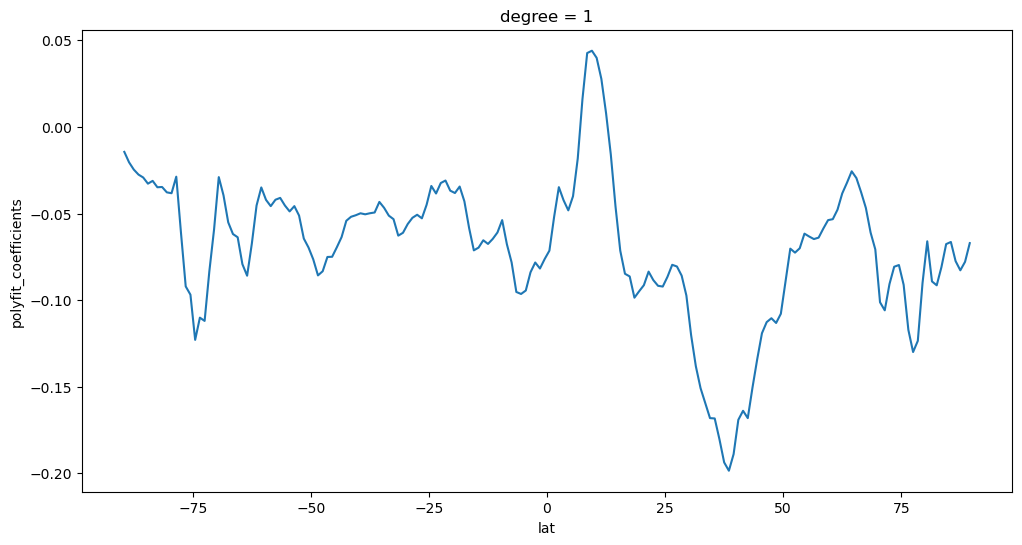

In [51]:
ceres_ebaf_plotting.plot_zonal_averages_from_global(sw_all_global_trends)

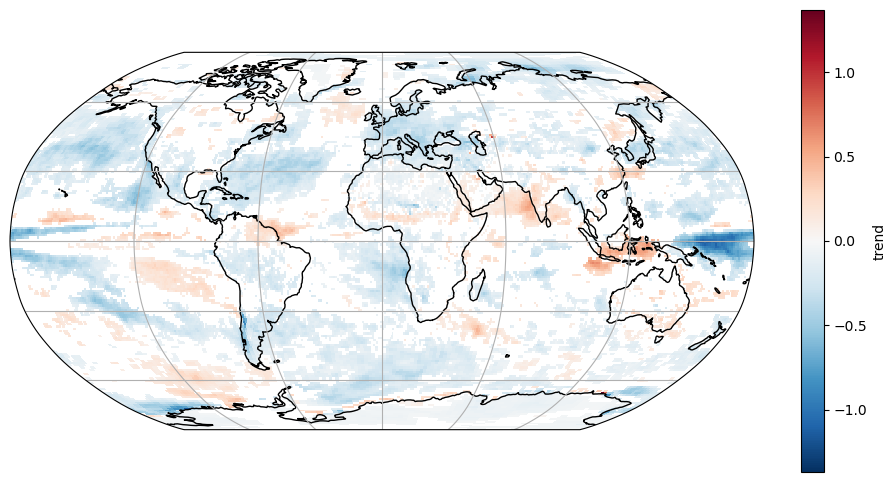

In [49]:
high_pValue = shortwave_all_sky_trends["trend"].where(shortwave_all_sky_trends["pValue"]<0.32)
ceres_ebaf_plotting.plot_spatial_data_trends(high_pValue, title="All Sky")

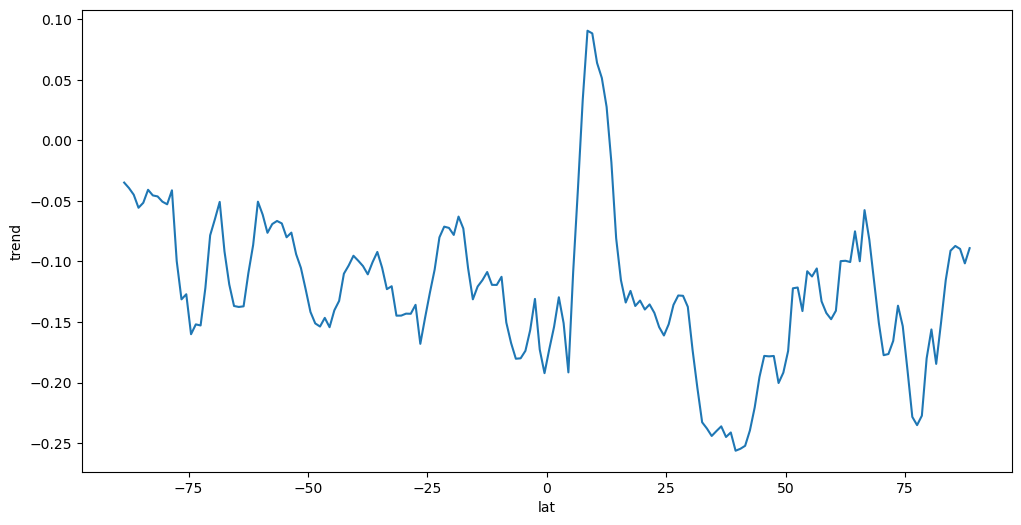

In [50]:
ceres_ebaf_plotting.plot_zonal_averages_from_global(high_pValue)

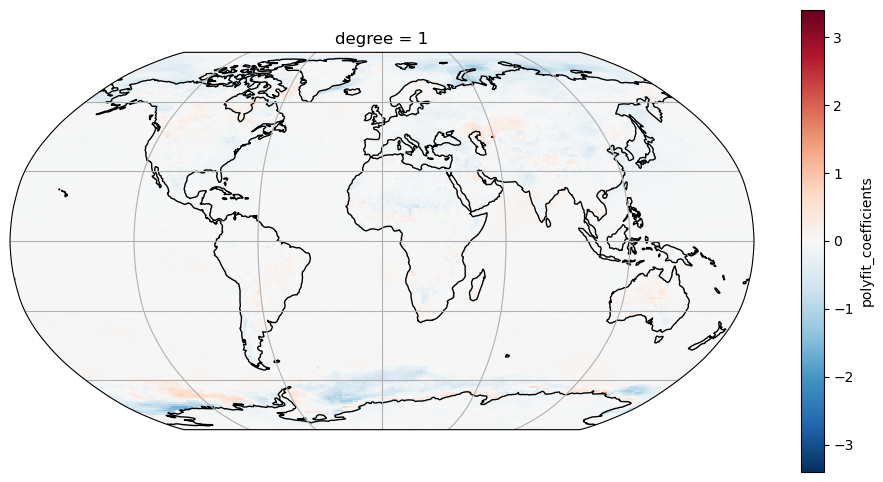

In [52]:
shortwave_clear_sky = ceres_ebaf.create_polyfit_trend_at_each_location(full_years["toa_sw_clr_c_mon"], time_weighting=1, end_yr="2023")
ceres_ebaf_plotting.plot_spatial_data_trends(shortwave_clear_sky)

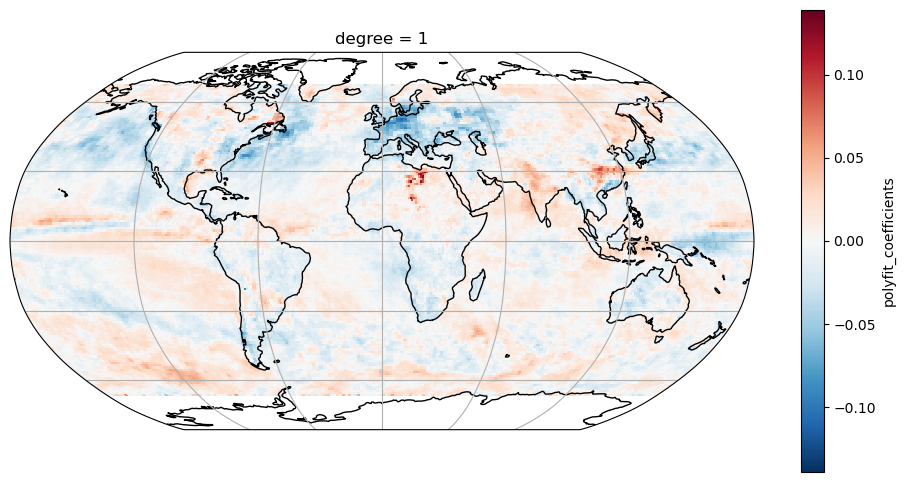

In [5]:
cloud_optical_depth_trend = ceres_ebaf.create_polyfit_trend_at_each_location(full_years["cldtau_total_day_mon"], time_weighting=2, end_yr="2023")
ceres_ebaf_plotting.plot_spatial_data_trends(cloud_optical_depth_trend)

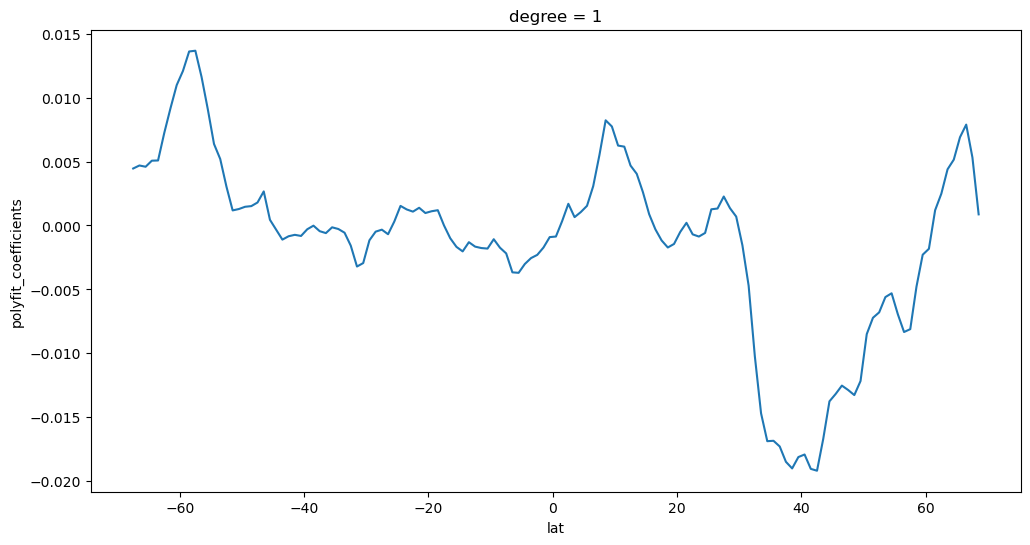

In [7]:
ceres_ebaf_plotting.plot_zonal_averages_from_global(cloud_optical_depth_trend)

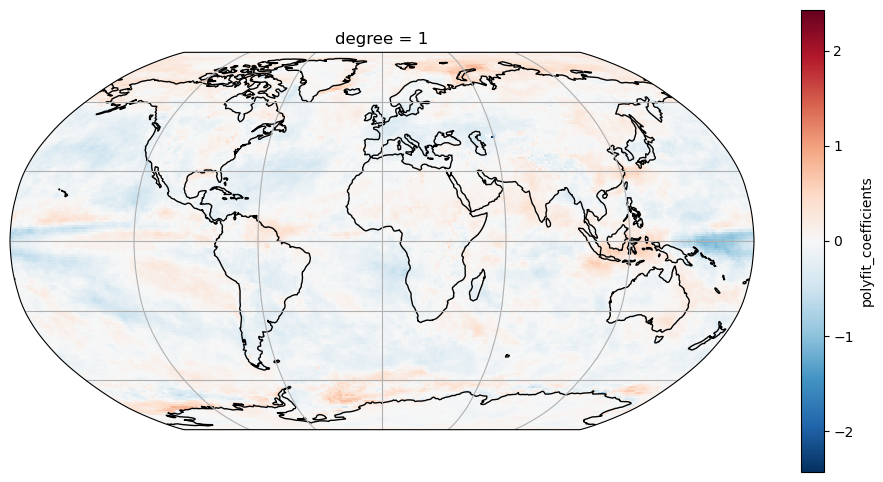

In [8]:
shortwave_all_sky = ceres_ebaf.create_polyfit_trend_at_each_location(full_years["toa_sw_all_mon"], time_weighting=1, end_yr="2023")
shortwave_clear_sky = ceres_ebaf.create_polyfit_trend_at_each_location(full_years["toa_sw_clr_c_mon"], time_weighting=1, end_yr="2023")
cre_total = shortwave_all_sky-shortwave_clear_sky
ceres_ebaf_plotting.plot_spatial_data_trends(cre_total)

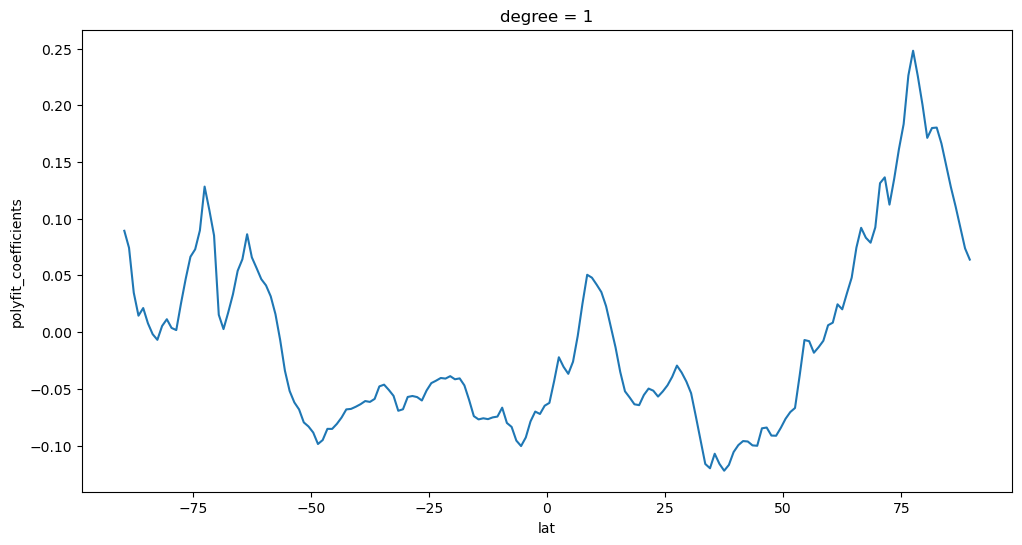

In [9]:
ceres_ebaf_plotting.plot_zonal_averages_from_global(cre_total)

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

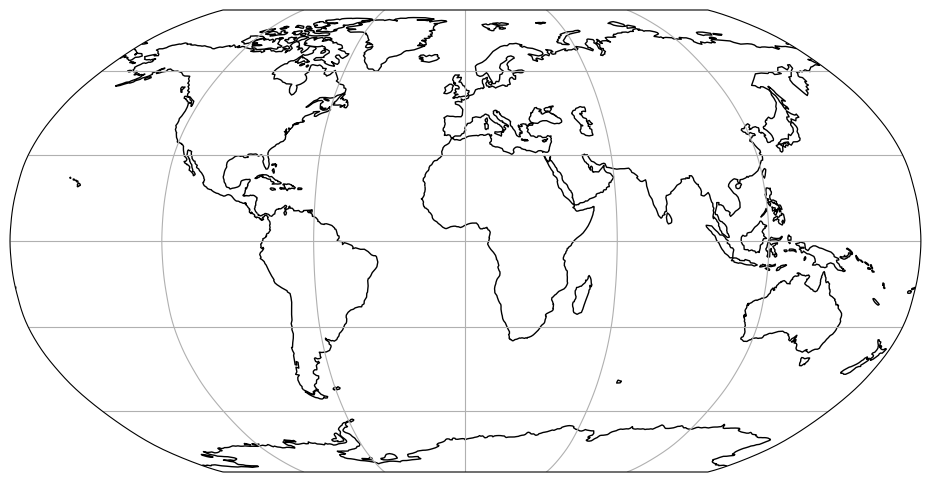

In [54]:
cloud_optical_depth = ceres_ebaf.create_hemisphere_data(full_years["cldtau_total_day_mon"], time_weighting=2, end_yr="2023")
ceres_ebaf_plotting.plot_spatial_data_trends(cloud_optical_depth)


In [ ]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
fig, ax = plt.subplots((1,3), projection=ccrs.PlateCarree)


# Someday make a 3D plot

In [ ]:
from mpl_toolkits import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set up a basemap with the desired projection
m = Basemap(projection='ortho', lat_0=50, lon_0=-100, resolution='l', ax=ax)

# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Sample data points (longitude, latitude, value)
data = [
    (-74.0059, 40.7128, 100),
    (139.6917, 35.6895, 200),
    (-0.1276, 51.5074, 300),
    (77.1025, 28.7041, 400),
    (151.2093, -33.8688, 500)
]

# Extract the longitude, latitude, and values from the data
lon = [d[0] for d in data]
lat = [d[1] for d in data]
values = [d[2] for d in data]

# Convert the coordinates to the basemap projection
x, y = m(lon, lat)

# Plot the data on the globe
ax.scatter(x, y, values)

# Show the plot
plt.show()
